In [13]:
import os
import numpy as np
import librosa
import matplotlib.pyplot as plt
from librosa import display
from librosa.feature import melspectrogram
from librosa.filters import mel

In [2]:
working_directory = os.getcwd()
working_directory

'F:\\Varsity\\CSE498'

In [4]:
training_directory = os.path.join(working_directory, 'train')
os.listdir(training_directory)

['angry', 'confused', 'fear', 'happy', 'neutral', 'sad']

In [5]:
happy_path = os.path.join(training_directory, 'happy')

In [6]:
sad_path = os.path.join(training_directory, 'sad')

In [6]:
# angry_path = os.path.join(training_directory, 'angry')

In [7]:
# fear_path = os.path.join(training_directory, 'fear')

In [7]:
neutral_path = os.path.join(training_directory, 'neutral')

In [8]:
#feature extraction for happy for 14.wav data
data, sampling_rate = librosa.load(os.path.join(happy_path, '14.wav'), sr = 16000, res_type='kaiser_best')

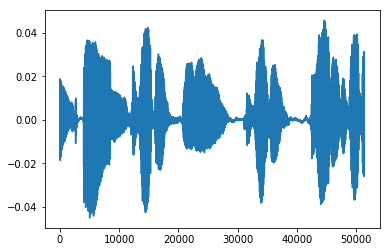

In [9]:
plt.plot(data)
plt.show()

In [10]:
 data

array([-0.00595093, -0.00601196, -0.00598145, ...,  0.02938843,
        0.02114868,  0.01208496], dtype=float32)

In [11]:
mel_power_spectrogram_feature = melspectrogram(data, sr = 16000)

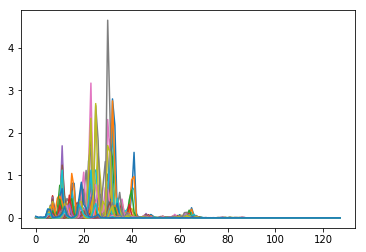

In [12]:
plt.plot(mel_power_spectrogram_feature)
plt.show()

In [13]:
mel_power_spectrogram_feature[:5]

array([[1.44630391e-03, 1.87353126e-03, 1.92833925e-03, 1.47528539e-03,
        1.16750598e-03, 9.29834496e-04, 2.43310258e-03, 4.97561088e-03,
        3.05604516e-03, 6.76002936e-04, 4.64967598e-04, 8.60670640e-04,
        3.00673419e-04, 6.98837393e-04, 8.82259570e-04, 5.05266886e-04,
        1.72224408e-03, 2.86569539e-03, 2.82973587e-03, 2.10463791e-03,
        7.76331930e-04, 3.72859323e-03, 6.81234896e-03, 5.21360198e-03,
        6.74799317e-03, 1.76695955e-03, 2.97900988e-03, 5.08205500e-03,
        3.55275581e-03, 1.85842789e-03, 1.12467492e-02, 2.86584776e-02,
        2.14004312e-02, 3.50825931e-03, 1.65421166e-03, 3.33578233e-03,
        9.56705306e-04, 5.63049340e-04, 7.50474865e-04, 2.91627855e-03,
        7.01463036e-03, 8.14728532e-03, 8.30664765e-03, 1.30300671e-02,
        2.16785837e-02, 1.70908477e-02, 6.52209856e-03, 4.36105812e-03,
        2.36990349e-03, 2.16000044e-04, 5.80062449e-04, 6.62991544e-04,
        8.29931232e-04, 1.10834150e-03, 2.24537356e-03, 2.316223

In [15]:
#now feature extraction function for whole dataset
def feature_extraction(dataset_path, class_name, sampling_rate, resampling_type):
    emotion_feature = []
    for wav_files in os.listdir(dataset_path):
        data, sampling_rate = librosa.load(os.path.join(dataset_path, wav_files), sr = sampling_rate, 
                                           res_type = resampling_type)
        mel_power_spectrogram_feature = melspectrogram(data, sr = sampling_rate)
        emotion_feature.append(mel_power_spectrogram_feature)
    return emotion_feature

In [16]:
happy_features = feature_extraction(happy_path, 16000, 'kaiser_best')

In [17]:
happy_features[:2]

[array([[5.71143217e-02, 5.99680506e-02, 1.28612164e-02, ...,
         1.53015815e-02, 7.58510269e-03, 4.96137701e-03],
        [6.85045719e-02, 2.19749752e-02, 1.67728739e-03, ...,
         2.31518270e-03, 5.46257128e-04, 6.90118817e-04],
        [2.69004926e-02, 1.35180447e-02, 8.58081388e-04, ...,
         4.64227138e-04, 3.34330980e-04, 3.34739045e-04],
        ...,
        [8.55764119e-06, 8.00734051e-06, 4.61991403e-05, ...,
         8.71065922e-08, 6.02316135e-08, 5.62046694e-08],
        [1.12332764e-05, 9.83778318e-06, 3.16439000e-05, ...,
         3.31555938e-08, 4.38185204e-08, 4.89917440e-08],
        [1.28678139e-05, 7.95127471e-06, 2.11120969e-05, ...,
         4.47606041e-08, 3.91696027e-08, 2.94328171e-08]], dtype=float32),
 array([[5.0608262e-02, 5.2062701e-02, 2.4137661e-02, ..., 1.2424890e-03,
         1.6837496e-03, 7.6282746e-04],
        [5.5006798e-03, 4.0433323e-03, 1.3144498e-03, ..., 2.0741846e-04,
         4.1478351e-04, 4.7707383e-04],
        [1.5479319e-02

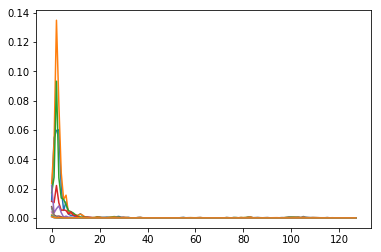

In [18]:
plt.plot(happy_features[2])
plt.show()

In [3]:
working_directory = os.getcwd()
CLASSES = ['Old_Talker_Angry', 'Old_Talker_Disgust', 'Old_Talker_Fear', 'Old_Talker_Happy', 'Old_Talker_Neutral', 'Old_Talker_Pleasent_Surprise', 'Old_Talker_Sad']
training_directory = os.path.join(working_directory, 'Toronto_Dataset')
# training_directory = os.path.join(training_directory, 'Toronto_Dataset')
old_Talker_Angry = os.path.join(training_directory, 'Old_Talker_Angry')
old_Talker_Disgust = os.path.join(training_directory, 'Old_Talker_Disgust')
old_Talker_Fear = os.path.join(training_directory, 'Old_Talker_Fear')
old_Talker_Happy = os.path.join(training_directory, 'Old_Talker_Happy')
old_Talker_Neutral = os.path.join(training_directory, 'Old_Talker_Neutral')
old_Talker_Pleasent_Surprise = os.path.join(training_directory, 'Old_Talker_Pleasent_Surprise')
old_Talker_Sad = os.path.join(training_directory, 'Old_Talker_Sad')

In [4]:
wave_file = None
for category in CLASSES:
    for wav_files in os.listdir(old_Talker_Angry):
        wave_file = wav_files
wave_file

'OAF_youth_angry.wav'

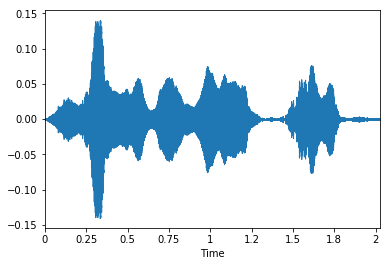

In [5]:
y, sr = librosa.load('Toronto_Dataset/Old_Talker_Happy/OAF_cheek_happy.wav')
whale_song, _ = librosa.effects.trim(y)
librosa.display.waveplot(whale_song, sr)

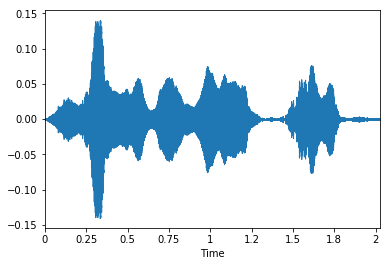

In [6]:
y, sr = librosa.load('Toronto_Dataset/Old_Talker_Happy/OAF_cheek_happy.wav')
# whale_song, _ = librosa.effects.trim(y)
librosa.display.waveplot(y, sr)

In [7]:
sr

22050

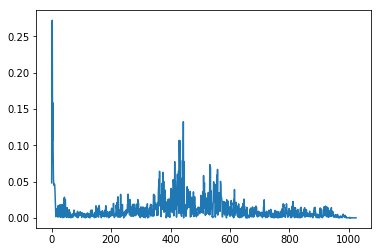

In [8]:
n_fft = 2048
D = np.abs(librosa.stft(whale_song[:n_fft], n_fft = n_fft, hop_length = n_fft+1))
plt.plot(D)

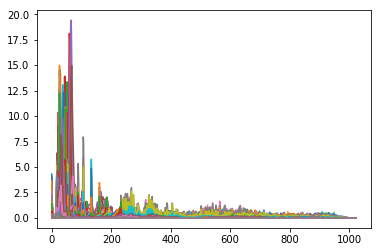

In [9]:
hop_length = 512
D = np.abs(librosa.stft(whale_song, n_fft = n_fft, hop_length = 512))
plt.plot(D)

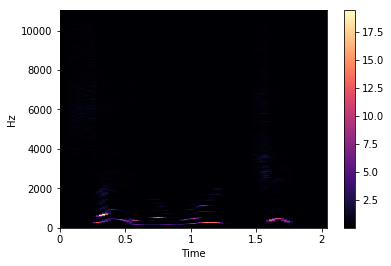

In [10]:
hop_length = 512
D = np.abs(librosa.stft(whale_song, n_fft = n_fft, hop_length = 512))
display.specshow(D, sr = sr, x_axis = 'time', y_axis = 'linear')
plt.colorbar()

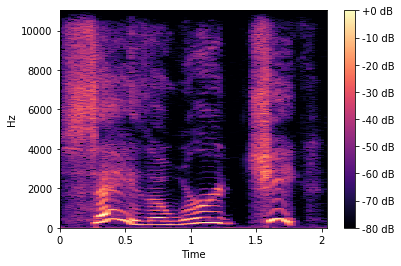

In [11]:
DB = librosa.amplitude_to_db(D, ref = np.max)
display.specshow(DB, sr = sr, hop_length = hop_length, x_axis = 'time', y_axis = 'linear')
plt.colorbar(format='%+2.0f dB')

In [14]:
n_mels = 128
mel = mel(sr = sr, n_fft = n_fft, n_mels = n_mels)

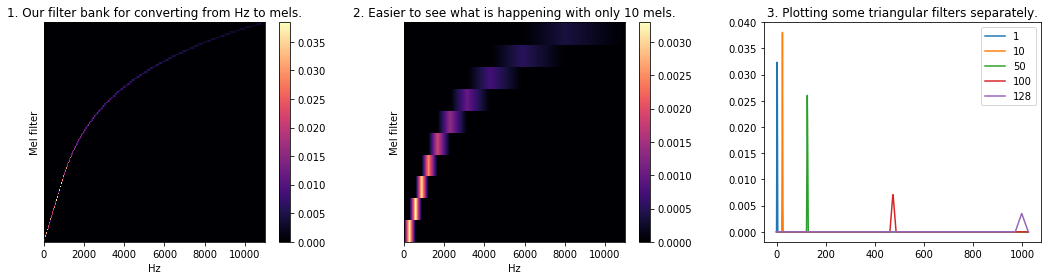

In [15]:
plt.figure(figsize=(15, 4));
plt.subplot(1, 3, 1);
librosa.display.specshow(mel, sr=sr, hop_length=hop_length, x_axis='linear');
plt.ylabel('Mel filter');
plt.colorbar();
plt.title('1. Our filter bank for converting from Hz to mels.');
plt.subplot(1, 3, 2);
mel_10 = librosa.filters.mel(sr=sr, n_fft=n_fft, n_mels=10)
librosa.display.specshow(mel_10, sr=sr, hop_length=hop_length, 
                         x_axis='linear');
plt.ylabel('Mel filter');
plt.colorbar();
plt.title('2. Easier to see what is happening with only 10 mels.');
plt.subplot(1, 3, 3);
idxs_to_plot = [0, 9, 49, 99, 127]
for i in idxs_to_plot:
    plt.plot(mel[i]);
plt.legend(labels=['{}'.format(i+1) for i in idxs_to_plot]);
plt.title('3. Plotting some triangular filters separately.');
plt.tight_layout();

In [16]:
D[:, 1]

array([3.9436918e-01, 5.0200975e-01, 3.7131140e-01, ..., 1.0745601e-04,
       6.1207320e-05, 1.0497069e-04], dtype=float32)

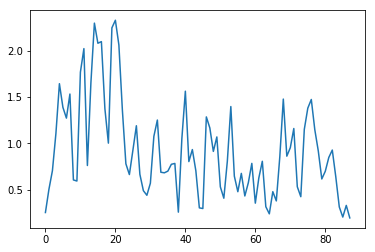

In [17]:
plt.plot(D[1, :]);

Text(0.5, 1.0, 'One Sampled Window for Stft and Mel Converted Stft')

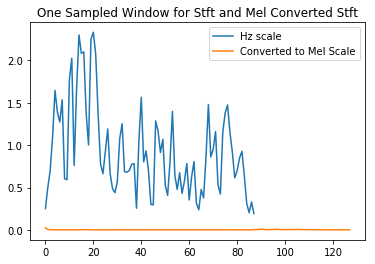

In [21]:
plt.plot(D[1, :]);
plt.plot(mel.dot(D[:,1]));
plt.legend(labels = ['Hz scale', 'Converted to Mel Scale']);
plt.title('One Sampled Window for Stft and Mel Converted Stft')

In [22]:
S = melspectrogram(whale_song, sr = sr, n_mels = n_mels, n_fft = n_fft, hop_length = hop_length)
S

array([[4.0714634e-03, 9.1556208e-03, 1.4166016e-02, ..., 1.6001724e-03,
        2.9318705e-03, 2.9783561e-03],
       [1.0935536e-03, 4.8972061e-04, 9.7997072e-05, ..., 2.7791213e-04,
        1.8892865e-04, 1.6156476e-04],
       [2.2882794e-04, 5.7663750e-05, 1.8985244e-05, ..., 2.7641669e-05,
        9.1641277e-06, 3.4457647e-05],
       ...,
       [3.7002587e-06, 5.2544237e-05, 3.7640691e-04, ..., 2.2023761e-07,
        1.1549497e-07, 9.1879116e-08],
       [5.1115796e-07, 1.2711173e-05, 1.1604583e-04, ..., 7.4339155e-08,
        2.7133934e-08, 4.7258879e-08],
       [1.7059959e-07, 1.9774084e-06, 6.4818310e-06, ..., 5.2167470e-09,
        4.1529815e-09, 1.4296642e-08]], dtype=float32)

In [23]:
S_DB = librosa.power_to_db(S, ref = np.max)
S_DB

array([[-39.081528, -35.562157, -33.666557, ..., -43.137367, -40.507584,
        -40.43927 ],
       [-44.790634, -48.27955 , -55.2669  , ..., -50.73996 , -52.416054,
        -53.095566],
       [-51.583946, -57.570007, -62.394875, ..., -60.76339 , -65.55812 ,
        -59.806175],
       ...,
       [-69.49671 , -57.973778, -49.422455, ..., -80.      , -80.      ,
        -80.      ],
       [-78.09348 , -64.13718 , -54.532738, ..., -80.      , -80.      ,
        -80.      ],
       [-80.      , -72.21807 , -67.06206 , ..., -80.      , -80.      ,
        -80.      ]], dtype=float32)

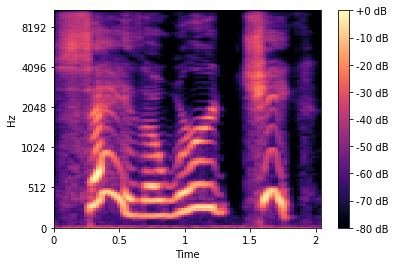

In [24]:
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel');
plt.colorbar(format='%+2.0f dB');

In [28]:
S = melspectrogram(whale_song, sr = sr, n_fft = n_fft, n_mels = n_mels, hop_length = 512)
stft_windows = librosa.stft(whale_song, n_fft = n_fft, hop_length = hop_length)
magnitude = np.abs(stft_windows) ** 2
mel_feature = librosa.filters.mel(sr = sr, n_fft = 2048, n_mels = 128)

In [29]:
S

array([[4.0714634e-03, 9.1556208e-03, 1.4166016e-02, ..., 1.6001724e-03,
        2.9318705e-03, 2.9783561e-03],
       [1.0935536e-03, 4.8972061e-04, 9.7997072e-05, ..., 2.7791213e-04,
        1.8892865e-04, 1.6156476e-04],
       [2.2882794e-04, 5.7663750e-05, 1.8985244e-05, ..., 2.7641669e-05,
        9.1641277e-06, 3.4457647e-05],
       ...,
       [3.7002587e-06, 5.2544237e-05, 3.7640691e-04, ..., 2.2023761e-07,
        1.1549497e-07, 9.1879116e-08],
       [5.1115796e-07, 1.2711173e-05, 1.1604583e-04, ..., 7.4339155e-08,
        2.7133934e-08, 4.7258879e-08],
       [1.7059959e-07, 1.9774084e-06, 6.4818310e-06, ..., 5.2167470e-09,
        4.1529815e-09, 1.4296642e-08]], dtype=float32)

In [30]:
mel_feature

array([[0.        , 0.01618285, 0.03236571, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00026052, 0.00013026,
        0.        ]], dtype=float32)

In [31]:
mel_feature.dot(magnitude)

array([[4.0714634e-03, 9.1556208e-03, 1.4166016e-02, ..., 1.6001724e-03,
        2.9318705e-03, 2.9783561e-03],
       [1.0935536e-03, 4.8972061e-04, 9.7997072e-05, ..., 2.7791213e-04,
        1.8892865e-04, 1.6156476e-04],
       [2.2882794e-04, 5.7663750e-05, 1.8985244e-05, ..., 2.7641669e-05,
        9.1641277e-06, 3.4457647e-05],
       ...,
       [3.7002587e-06, 5.2544237e-05, 3.7640691e-04, ..., 2.2023761e-07,
        1.1549497e-07, 9.1879116e-08],
       [5.1115796e-07, 1.2711173e-05, 1.1604583e-04, ..., 7.4339155e-08,
        2.7133934e-08, 4.7258879e-08],
       [1.7059959e-07, 1.9774084e-06, 6.4818310e-06, ..., 5.2167470e-09,
        4.1529815e-09, 1.4296642e-08]], dtype=float32)

In [33]:
assert(mel_feature.dot(magnitude) == S).all()

In [12]:
# Sanity check that indeed we understood the underlying pipeline
whale_song = wave_file
n_fft = 2048
hop_length = 512
n_mels = 128

S = librosa.feature.melspectrogram(whale_song, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
fft_windows = librosa.stft(whale_song, n_fft=n_fft, hop_length=hop_length)
magnitude = np.abs(fft_windows)**2
mel = librosa.filters.mel(sr=sr, n_fft=n_fft, n_mels=n_mels)
assert (mel.dot(magnitude) == S).all()

NameError: name 'sr' is not defined